In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
#cleaning up data
df = pd.read_csv("player_full.csv")
df = df.sort_values('mmr', ascending = False).sort_values('playerid')
bool_series = df['playerid'].duplicated()
df['check'] = bool_series
df = df[df.check == False]
df = df.drop('check',axis=1)
df = df.sort_values("mmr",ascending = False)
df = df[df.mmr < 10000]
df = df[df.mmr != 0]
df = df[df.wins != 'unknown']
df = df[df.losses != 'unknown']
df['wins'] = pd.to_numeric(df['wins'])
df['losses'] = pd.to_numeric(df['losses'])
df['total'] = df['wins'] + df['losses']
df['percentage win'] = df['wins'] / df['total'] * 100

In [25]:
dh = df[df.total == 1]
dh.head(30)

,Unnamed: 0,playerid,name,realm,region,mmr,league,wins,losses,race,total,percentage win
106234,106234,8806698,llllllllllll,1,2,7830,Grandmaster 1,1,0,ZERG,1,100.0
209906,209906,11073152,IllIIlIIlIIl,1,1,7350,Grandmaster 1,1,0,ZERG,1,100.0
205820,205820,2331025,Scarlett,1,1,6701,Masters 1,1,0,ZERG,1,100.0
100584,100584,4246402,yummy,1,2,6436,Masters 1,0,1,PROTOSS,1,0.0
205062,205062,8048386,SpeCial,1,1,6321,Masters 1,1,0,TERRAN,1,100.0
101859,101859,498165,IIIIIIIIIII,1,2,6251,Masters 1,0,1,TERRAN,1,0.0
100085,100085,8533798,llllllllllll,1,2,6212,Masters 1,1,0,PROTOSS,1,100.0
100788,100788,332978,KITor,2,2,6107,Masters 1,1,0,ZERG,1,100.0
101165,101165,2497204,NightPhoenix,2,2,6104,Masters 1,1,0,PROTOSS,1,100.0
100496,100496,4937072,jheffe,1,2,6103,Masters 1,1,0,TERRAN,1,100.0


In [3]:
df = df[df.wins != 'unknown']
df = df[df.losses != 'unknown']
df['wins'] = pd.to_numeric(df['wins'])
df['losses'] = pd.to_numeric(df['losses'])
df['total'] = df['wins'] + df['losses']
df['percentage win'] = df['wins'] / df['total'] * 100

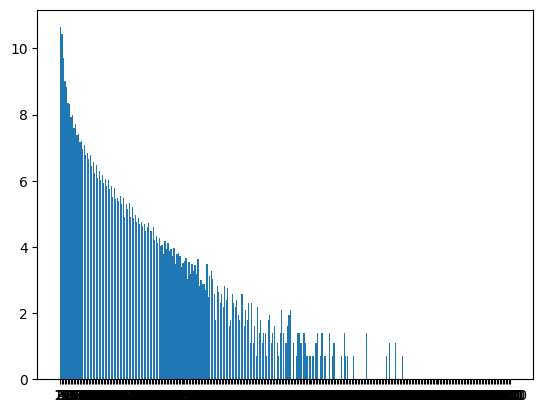

In [19]:
#total distribution
dg = df[df.total < 3000].sort_values('total', ascending = True)
#dg = df.sort_values('total', ascending = True)
thelist = dg['total'].tolist()
thedict = {}
for i in range(302):
    thedict[i*10] = 0
for i in thelist:
    j = round(i,-1)
    thedict[j] += 1
names = list(thedict.keys())
for i in thedict:
    if thedict[i] != 0:
        thedict[i] = math.log(thedict[i])
values = list(thedict.values())

plt.bar(range(len(thedict)), values, tick_label=names)
plt.show()

In [26]:
#lol
dg = df[df.total == 2]
dg

,Unnamed: 0,playerid,name,realm,region,mmr,league,wins,losses,race,total,percentage win
106235,106235,8852487,IllIIlllIllI,1,2,7537,Grandmaster 1,1,1,ZERG,2,50.0
209907,209907,11124859,IlIIllIIllIl,1,1,7168,Grandmaster 1,1,1,ZERG,2,50.0
101168,101168,1459895,PtitDrogo,1,2,6618,Masters 1,1,1,PROTOSS,2,50.0
100078,100078,889358,Lain,2,2,6534,Masters 1,1,1,PROTOSS,2,50.0
205807,205807,11192787,NotABarcode,1,1,6524,Masters 1,2,0,ZERG,2,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169874,169874,10080953,BobTheIntern,1,1,1091,Silver 3,0,2,TERRAN,2,0.0
166839,166839,11295012,TheArtOfWar,1,1,1077,Silver 3,0,2,ZERG,2,0.0
57852,57852,9938365,Rauchtiger,1,2,1056,Silver 3,1,1,PROTOSS,2,50.0
170039,170039,11678415,miguelh,1,1,1048,Silver 3,1,1,PROTOSS,2,50.0


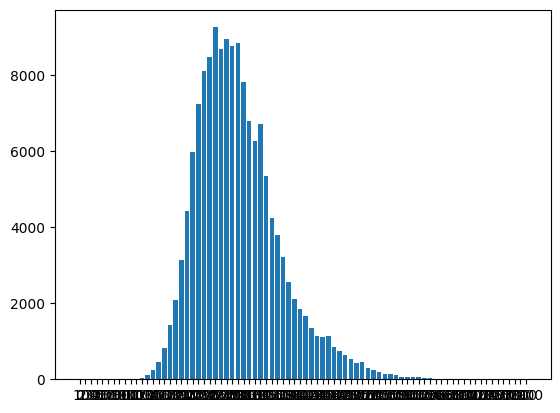

{0: 0, 100: 0, 200: 2, 300: 1, 400: 1, 500: 0, 600: 4, 700: 5, 800: 4, 900: 12, 1000: 19, 1100: 45, 1200: 115, 1300: 233, 1400: 463, 1500: 822, 1600: 1419, 1700: 2092, 1800: 3145, 1900: 4430, 2000: 5988, 2100: 7242, 2200: 8102, 2300: 8488, 2400: 9261, 2500: 8685, 2600: 8955, 2700: 8771, 2800: 8850, 2900: 7822, 3000: 6808, 3100: 6281, 3200: 6706, 3300: 5348, 3400: 4237, 3500: 3798, 3600: 3214, 3700: 2561, 3800: 2119, 3900: 1855, 4000: 1664, 4100: 1336, 4200: 1132, 4300: 1119, 4400: 1139, 4500: 842, 4600: 738, 4700: 637, 4800: 545, 4900: 420, 5000: 448, 5100: 287, 5200: 243, 5300: 199, 5400: 148, 5500: 137, 5600: 114, 5700: 62, 5800: 72, 5900: 68, 6000: 47, 6100: 27, 6200: 22, 6300: 14, 6400: 14, 6500: 13, 6600: 5, 6700: 5, 6800: 7, 6900: 2, 7000: 1, 7100: 0, 7200: 1, 7300: 0, 7400: 1, 7500: 2, 7600: 0, 7700: 0, 7800: 1, 7900: 0}


In [31]:
#mmr distribution
dg = df.sort_values('mmr', ascending = False)
thelist = dg['mmr'].tolist()
thedict = {}
for i in range(80):
    thedict[i*100] = 0
for i in thelist:
    j = round(i,-2)
    thedict[j] += 1
    
names = list(thedict.keys())
values = list(thedict.values())

plt.bar(range(len(thedict)), values, tick_label=names)
plt.show()
print(thedict)

In [5]:
#mafs
statistics.stdev(thelist)

738.2099633621871

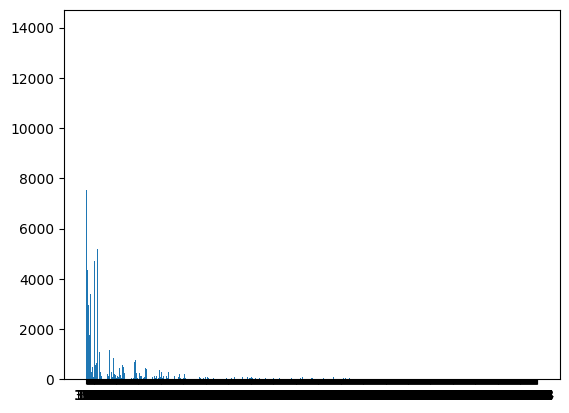

{1: 14012, 2: 7540, 134: 150, 392: 25, 8: 4349, 384: 27, 138: 131, 11: 2960, 3: 5671, 119: 148, 17: 1752, 125: 132, 354: 26, 10: 3413, 27: 998, 14: 2154, 76: 283, 9: 3834, 13: 2494, 48: 474, 99: 216, 95: 197, 188: 84, 351: 23, 66: 329, 4: 4710, 738: 3, 181: 85, 46: 563, 19: 1474, 79: 294, 37: 651, 62: 351, 43: 597, 7: 5168, 121: 160, 20: 1429, 671: 3, 461: 20, 12: 2680, 25: 1102, 32: 830, 120: 163, 80: 282, 114: 161, 35: 736, 124: 132, 34: 782, 192: 79, 16: 1898, 26: 1056, 70: 286, 231: 52, 572: 10, 22: 1238, 118: 139, 142: 123, 23: 1208, 178: 92, 61: 338, 436: 18, 5: 9731, 390: 24, 194: 85, 457: 20, 88: 214, 112: 170, 180: 86, 152: 122, 442: 19, 50: 476, 24: 1171, 193: 93, 21: 1373, 533: 12, 40: 622, 86: 231, 73: 292, 269: 50, 85: 246, 175: 89, 44: 506, 94: 215, 31: 841, 78: 259, 2012: 1, 101: 200, 98: 220, 226: 59, 116: 166, 65: 348, 69: 275, 236: 55, 68: 341, 38: 694, 154: 112, 735: 6, 897: 4, 172: 91, 139: 119, 28: 933, 49: 452, 147: 137, 986: 2, 131: 151, 366: 24, 508: 19, 310: 40

In [28]:
#distribution of number of games
thelist = df['total'].tolist()
thedict = {}
for i in thelist:
    if i in thedict:
        thedict[i]  += 1
    else:
        thedict[i] = 1
names = list(thedict.keys())
values = list(thedict.values())

plt.bar(range(len(thedict)), values, tick_label=names)
plt.show()
print(thedict)

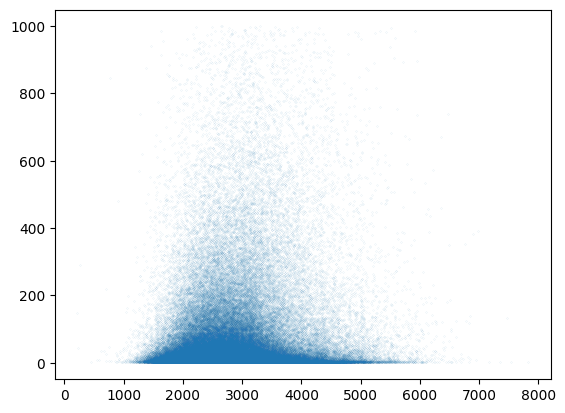

In [12]:
#total distribution
dh = df[df.total < 1000].sort_values('total', ascending = True)
#dg = df.sort_values('total', ascending = True)
lista = dh['mmr'].tolist()
listb = dh['total'].tolist()

plt.scatter(lista, listb, s=0.0015)
plt.show()